In [544]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [545]:
df1 = pd.read_csv("adsb_data/adsb_data_39_columns.csv")
print(df1.shape)
df1_cols = df1.columns
print(df1_cols)
print(df1["category"].unique())
df1.head()

(63, 39)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'baro_rate', 'squawk', 'emergency', 'category', 'nav_qnh',
       'nav_altitude_mcp', 'nav_modes', 'lat', 'lon', 'nic', 'rc', 'seen_pos',
       'version', 'nic_baro', 'nac_p', 'nac_v', 'sil', 'sil_type', 'gva',
       'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages', 'seen', 'rssi',
       'nav_heading', 'geom_rate', 'timestamp'],
      dtype='object')
['A3' 'A2' 'A1' 'A7' 'A5' 'A0' nan]


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,baro_rate,...,alert,spi,mlat,tisb,messages,seen,rssi,nav_heading,geom_rate,timestamp
0,ab5714,adsb_icao,N83M,N83M,GLF5,30200,31975.0,442.4,152.10,-1664.0,...,0,0,[],[],1883974,0.1,-11.2,NaN,NaN,2024-10-06 20:45:09.706647+00:00
1,a47d4c,adsb_icao,LXJ389,N389FX,E55P,8300,8550.0,225.6,134.46,-1536.0,...,0,0,[],[],10594051,0.1,-15.8,139.22,NaN,2024-10-06 20:45:09.706647+00:00
2,a9a419,adsb_icao,FFT1892,N720FR,A321,13925,14525.0,350.1,150.95,-2304.0,...,0,0,[],[],31819053,0.0,-11.2,NaN,NaN,2024-10-06 20:45:09.706647+00:00
3,a62c1a,adsb_icao,SWA4278,N497WN,B737,11925,12425.0,368.9,150.79,-2368.0,...,0,0,[],[],21804947,0.1,-18.7,158.20,NaN,2024-10-06 20:45:09.706647+00:00
4,abac48,adsb_icao,AAL2679,N851NN,B738,5475,5600.0,259.5,163.66,-1792.0,...,0,0,[],[],29308856,0.3,-10.5,168.05,NaN,2024-10-06 20:45:09.706647+00:00


In [546]:
df2 = pd.read_csv("adsb_data/adsb_data_40_columns.csv")
print(df2.shape)
df2_cols = df2.columns
print(df2_cols)
print(df2["category"].unique())
df2.head()

(526, 40)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'geom_rate', 'squawk', 'emergency', 'category', 'nav_qnh',
       'nav_altitude_mcp', 'nav_heading', 'lat', 'lon', 'nic', 'rc',
       'seen_pos', 'version', 'nic_baro', 'nac_p', 'nac_v', 'sil', 'sil_type',
       'gva', 'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages', 'seen',
       'rssi', 'baro_rate', 'nav_modes', 'dbFlags', 'timestamp'],
      dtype='object')
['A1' 'A3' 'A2' 'A7' nan 'A5' 'A4']


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,geom_rate,...,spi,mlat,tisb,messages,seen,rssi,baro_rate,nav_modes,dbFlags,timestamp
0,a36ffc,adsb_icao,N320TC,N320TC,P180,27275,28925.0,380.1,100.30,-2048.0,...,0.0,[],[],3976388.0,0.0,-18.7,NaN,NaN,NaN,2024-10-06 00:12:13.334903+00:00
1,abbd0a,adsb_icao,SWA754,N8555Z,B738,12650,13325.0,368.3,151.28,NaN,...,0.0,[],[],34440178.0,0.0,-20.3,-2432.0,NaN,NaN,2024-10-06 00:12:13.334903+00:00
2,ac00d6,adsb_icao,SWA497,N8725L,B38M,10275,10800.0,320.5,150.88,NaN,...,0.0,[],[],22374043.0,0.1,-8.2,-1088.0,NaN,NaN,2024-10-06 00:12:13.334903+00:00
3,a560f4,adsb_icao,AAL2578,N446AN,A21N,34000,36175.0,430.7,301.81,NaN,...,0.0,[],[],34705266.0,0.1,-8.0,0.0,NaN,NaN,2024-10-06 00:12:13.334903+00:00
4,a02e1c,adsr_icao,N110VP,N110VP,P28A,700,600.0,67.2,75.34,NaN,...,0.0,[],[],1086836.0,0.4,-4.3,704.0,NaN,NaN,2024-10-06 00:12:13.334903+00:00


In [547]:
df3 = pd.read_csv("adsb_data/adsb_data_41_columns.csv")
print(df3.shape)
df3_cols = df3.columns
print(df3_cols)
print(df3["category"].unique())
df3.head()

(749, 41)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'baro_rate', 'squawk', 'emergency', 'category', 'nav_qnh',
       'nav_altitude_mcp', 'nav_heading', 'nav_modes', 'lat', 'lon', 'nic',
       'rc', 'seen_pos', 'version', 'nic_baro', 'nac_p', 'nac_v', 'sil',
       'sil_type', 'gva', 'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages',
       'seen', 'rssi', 'geom_rate', 'mag_heading', 'true_heading',
       'timestamp'],
      dtype='object')
['A1' 'A3' nan 'A2' 'A5' 'A7' 'A4' 'A0']


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,baro_rate,...,spi,mlat,tisb,messages,seen,rssi,geom_rate,mag_heading,true_heading,timestamp
0,ad6bd4,adsb_icao,N964JK,N964JK,TBM7,9000,9350.0,264.6,150.82,0.0,...,0.0,[],[],1559876.0,0.1,-13.3,NaN,NaN,NaN,2024-10-05 20:05:41.767968+00:00
1,a03e0b,adsb_icao,N1144Z,N1144Z,P28A,2900,3050.0,98.8,324.06,NaN,...,0.0,[],[],4242150.0,0.4,-8.8,-64.0,NaN,NaN,2024-10-05 20:05:41.767968+00:00
2,ab6247,adsb_icao,SWA4278,N8321D,B738,10100,10600.0,320.0,151.03,-1152.0,...,0.0,[],[],30416454.0,0.0,-18.3,NaN,NaN,NaN,2024-10-05 20:05:41.767968+00:00
3,a6df5a,mlat,CXK399,N542A,P28A,2225,2475.0,135.0,89.00,-355.0,...,0.0,"['callsign', 'gs', 'track', 'baro_rate', 'squa...",[],5241990.0,0.9,-11.3,NaN,NaN,NaN,2024-10-05 20:05:41.767968+00:00
4,a41447,adsb_icao,FFT3054,N362FR,A20N,9100,9525.0,285.0,135.43,-1408.0,...,0.0,[],[],31936506.0,0.0,-6.2,NaN,NaN,NaN,2024-10-05 20:05:41.767968+00:00


In [548]:
df4 = pd.read_csv("adsb_data/adsb_data_42_columns.csv")
print(df4.shape)
df4_cols = df4.columns
print(df4_cols)
print(df4["category"].unique())
df4.head()

(698, 42)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'baro_rate', 'squawk', 'emergency', 'category', 'lat', 'lon',
       'nic', 'rc', 'seen_pos', 'version', 'nic_baro', 'nac_p', 'nac_v', 'sil',
       'sil_type', 'gva', 'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages',
       'seen', 'rssi', 'nav_qnh', 'nav_altitude_mcp', 'geom_rate',
       'nav_heading', 'nav_altitude_fms', 'nav_modes', 'true_heading',
       'dbFlags', 'timestamp'],
      dtype='object')
['A2' 'A1' 'A3' nan 'A5' 'A7' 'A4' 'A0' 'A6']


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,baro_rate,...,rssi,nav_qnh,nav_altitude_mcp,geom_rate,nav_heading,nav_altitude_fms,nav_modes,true_heading,dbFlags,timestamp
0,a8e84c,adsb_icao,EJA673,N673QS,C56X,26175,27725.0,426.0,171.22,-1216.0,...,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 20:50:45.000327+00:00
1,a8834f,adsb_icao,N648DS,N648DS,DA40,6025,6275.0,135.4,322.20,-128.0,...,-18.1,1012.8,6016.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 20:50:45.000327+00:00
2,a5c11a,adsr_icao,CXK626,N470A,P28A,2000,2025.0,107.1,310.83,-2.0,...,-12.7,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN,2024-10-05 20:50:45.000327+00:00
3,a3b11e,adsb_icao,AAL2679,N337PJ,B738,5000,5225.0,263.0,135.00,0.0,...,-7.2,1013.6,4992.0,NaN,137.11,NaN,NaN,NaN,NaN,2024-10-05 20:50:45.000327+00:00
4,a7bb1f,mlat,CXK515,N598A,P28A,2825,NaN,94.0,111.00,124.0,...,-13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 20:50:45.000327+00:00


In [549]:
df5 = pd.read_csv("adsb_data/adsb_data_43_columns.csv")
print(df5.shape)
df5_cols = df5.columns
print(df5_cols)
print(df5["category"].unique())
df5.head()

(101, 43)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'baro_rate', 'squawk', 'emergency', 'category', 'nav_qnh',
       'nav_altitude_mcp', 'nav_modes', 'lat', 'lon', 'nic', 'rc', 'seen_pos',
       'version', 'nic_baro', 'nac_p', 'nac_v', 'sil', 'sil_type', 'gva',
       'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages', 'seen', 'rssi',
       'nav_heading', 'geom_rate', 'mag_heading', 'true_heading', 'dbFlags',
       'nav_altitude_fms', 'timestamp'],
      dtype='object')
['A2' 'A3' 'A1' nan 'A7' 'A4' 'A5']


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,baro_rate,...,messages,seen,rssi,nav_heading,geom_rate,mag_heading,true_heading,dbFlags,nav_altitude_fms,timestamp
0,a6e480,adsb_icao,EJA543,N543QS,C68A,40000,42350.0,407.8,347.39,0.0,...,11518791,0.0,-19.2,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-06 15:10:47.180087+00:00
1,ac04d3,adsb_icao,SWA1931,N8737L,B38M,27000,28650.0,434.6,159.10,-256.0,...,27033345,0.1,-12.9,168.05,NaN,NaN,NaN,NaN,NaN,2024-10-06 15:10:47.180087+00:00
2,a2283a,adsb_icao,N238WP,N238WP,SR22,6000,6225.0,177.1,357.74,0.0,...,3761139,0.1,-9.9,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-06 15:10:47.180087+00:00
3,a55731,adsb_icao,EJA443,N443QS,E55P,27000,28650.0,414.7,158.20,64.0,...,6134449,0.0,-12.6,166.64,NaN,NaN,NaN,NaN,NaN,2024-10-06 15:10:47.180087+00:00
4,a79523,adsb_icao,N588RM,N588RM,SF50,15000,15725.0,264.7,150.34,0.0,...,1320992,0.1,-4.9,NaN,0.0,NaN,NaN,NaN,NaN,2024-10-06 15:10:47.180087+00:00


In [550]:
df6 = pd.read_csv("adsb_data/adsb_data_44_columns.csv")
print(df6.shape)
df6_cols = df6.columns
print(df6_cols)
print(df6["category"].unique())
df6.head()

(161, 44)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'geom_rate', 'squawk', 'emergency', 'category',
       'nav_altitude_fms', 'nav_heading', 'lat', 'lon', 'nic', 'rc',
       'seen_pos', 'version', 'nic_baro', 'nac_p', 'nac_v', 'sil', 'sil_type',
       'gva', 'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages', 'seen',
       'rssi', 'baro_rate', 'nav_qnh', 'nav_altitude_mcp', 'nav_modes',
       'true_heading', 'mag_heading', 'ias', 'mach', 'timestamp'],
      dtype='object')
['A1' 'A2' 'A3' nan 'A4' 'A7']


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,geom_rate,...,rssi,baro_rate,nav_qnh,nav_altitude_mcp,nav_modes,true_heading,mag_heading,ias,mach,timestamp
0,a4f744,adsb_icao,WUP419TM,N419TM,BE40,30475,32375.0,441.1,178.96,-1920.0,...,-16.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:05:46.182277+00:00
1,ac74b3,adsb_icao,WUP901,N901UP,C750,13050,13700.0,319.4,115.20,NaN,...,-11.7,-1664.0,1012.8,10016.0,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:05:46.182277+00:00
2,aa9eb3,adsb_icao,SWA1189,N7835A,B737,29000,30775.0,453.2,162.00,NaN,...,-11.8,-2240.0,1013.6,27008.0,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:05:46.182277+00:00
3,a6db36,adsb_icao,N54067,N54067,C172,3600,3775.0,58.7,351.18,-64.0,...,-13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:05:46.182277+00:00
4,a7bb1f,mlat,CXK515,N598A,P28A,1475,NaN,109.0,179.00,NaN,...,-14.5,-151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:05:46.182277+00:00


In [551]:
# df7 = pd.read_csv("adsb_data/adsb_data_45_columns.csv")
# print(df7.shape)
# df7_cols = df7.columns
# print(df7_cols)
# print(df7["category"].unique())
# df7.head()

In [552]:
df8 = pd.read_csv("adsb_data/adsb_data_47_columns.csv")
print(df8.shape)
df8_cols = df8.columns
print(df8_cols)
print(df8["category"].unique())
df8.head()

(107, 47)
Index(['hex', 'type', 'flight', 'r', 't', 'alt_baro', 'alt_geom', 'gs',
       'track', 'geom_rate', 'squawk', 'emergency', 'category', 'nav_qnh',
       'nav_altitude_mcp', 'nav_heading', 'lat', 'lon', 'nic', 'rc',
       'seen_pos', 'version', 'nic_baro', 'nac_p', 'nac_v', 'sil', 'sil_type',
       'gva', 'sda', 'alert', 'spi', 'mlat', 'tisb', 'messages', 'seen',
       'rssi', 'baro_rate', 'true_heading', 'tas', 'nav_altitude_fms',
       'calc_track', 'nav_modes', 'dbFlags', 'ias', 'mach', 'mag_heading',
       'timestamp'],
      dtype='object')
['A2' 'A1' 'A3' 'A7' 'A5' nan]


,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,geom_rate,...,true_heading,tas,nav_altitude_fms,calc_track,nav_modes,dbFlags,ias,mach,mag_heading,timestamp
0,a3e4df,adsb_icao,N350AT,N350AT,CL30,25250,26750.0,448.0,89.87,-1216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:27:10.319343+00:00
1,aab5e7,adsb_icao,N79CJ,N79CJ,FA10,36000,38325.0,459.0,356.25,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:27:10.319343+00:00
2,a96157,adsb_icao,SIL89,N703SV,AT75,17000,17850.0,262.6,159.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:27:10.319343+00:00
3,a4c846,adsb_icao,SIL80,N407SV,AT45,7825,8100.0,255.8,330.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:27:10.319343+00:00
4,a8050c,adsr_icao,CXK117,N616AD,P28A,1450,1425.0,84.1,92.73,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 23:27:10.319343+00:00


In [553]:
df9 = pd.read_csv("adsb_data/adsb_data_L.csv")
print(df9.shape)
df9_cols = df9.columns
print(df9_cols)
print(df9["category"].unique())
df9.head()

(32385, 22)
Index(['hex', 'flight', 't', 'category', 'alt_baro', 'alt_geom', 'gs', 'track',
       'baro_rate', 'geom_rate', 'emergency', 'lat', 'lon', 'nac_p', 'nac_v',
       'alert', 'seen', 'nav_altitude_mcp', 'nav_heading', 'true_heading',
       'timestamp', 'mph'],
      dtype='object')
['A1' 'A4' 'A3' 'A2' 'A7' 'A5' nan 'A0' 'A6' 'B4' 'B1' 'B6' 'B2']


,hex,flight,t,category,alt_baro,alt_geom,gs,track,baro_rate,geom_rate,...,lon,nac_p,nac_v,alert,seen,nav_altitude_mcp,nav_heading,true_heading,timestamp,mph
0,a98bef,N714LM,C525,A1,16025,16825.0,316.9,155.78,-2496.0,NaN,...,-83.162519,10.0,2.0,0.0,0.0,12992.0,NaN,NaN,2024-10-01 19:41:01.080409+00:00,364.7519
1,a8d600,DAL1196,B752,A4,38000,40225.0,466.0,3.81,64.0,NaN,...,-83.133703,10.0,2.0,0.0,0.2,38016.0,4.92,NaN,2024-10-01 19:41:01.080409+00:00,536.3660
2,a9036a,N680CA,BE20,A1,6025,6250.0,191.4,63.30,0.0,NaN,...,-83.105868,10.0,2.0,0.0,0.1,6016.0,NaN,NaN,2024-10-01 19:41:01.080409+00:00,220.3014
3,a416be,UAL2246,B738,A3,30125,32025.0,440.2,162.14,-2112.0,NaN,...,-83.078506,8.0,1.0,0.0,0.0,27008.0,130.08,NaN,2024-10-01 19:41:01.080409+00:00,506.6702
4,a88b70,N65LW,C25B,A1,7575,7850.0,243.6,156.28,NaN,-1600.0,...,-83.022542,10.0,1.0,0.0,0.1,6016.0,180.00,NaN,2024-10-01 19:41:01.080409+00:00,280.3836


In [554]:
# Find the common columns across all DataFrames
common_cols = set.intersection(*map(set, [df1_cols, df2_cols, df3_cols, df4_cols,
                                          df5_cols, df6_cols, df8_cols, df9_cols]))

# Convert the set of common columns to a list
common_cols_list = list(common_cols)  

In [555]:
# Select only the common columns from each DataFrame
df1_common = df1[common_cols]
df2_common = df2[common_cols]
df3_common = df3[common_cols]
df4_common = df4[common_cols]
df5_common = df5[common_cols]
df6_common = df6[common_cols]
# df7_common = df7[common_cols]
df8_common = df8[common_cols]
df9_common = df9[common_cols]

# Concatenate the DataFrames with common columns
combined_df = pd.concat([df1_common, df2_common, df3_common, df4_common,
                         df5_common, df6_common, df8_common, df9_common], ignore_index=True)
print(combined_df.shape)
combined_df.head()

(34790, 20)


C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\3848308298.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\3848308298.py:3: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\3848308298.py:4: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\3848308298.py:5: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\3848308298.py:6: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Domenick Dobbs\AppData\Local\Te

,lon,emergency,flight,seen,nac_p,gs,t,timestamp,alert,nav_heading,category,baro_rate,alt_baro,track,hex,alt_geom,lat,geom_rate,nav_altitude_mcp,nac_v
0,-83.193970,none,N83M,0.1,10.0,442.4,GLF5,2024-10-06 20:45:09.706647+00:00,0,NaN,A3,-1664.0,30200,152.10,ab5714,31975.0,27.791428,NaN,11008.0,2.0
1,-83.099318,none,LXJ389,0.1,10.0,225.6,E55P,2024-10-06 20:45:09.706647+00:00,0,139.22,A2,-1536.0,8300,134.46,a47d4c,8550.0,27.873385,NaN,3008.0,2.0
2,-83.092610,none,FFT1892,0.0,10.0,350.1,A321,2024-10-06 20:45:09.706647+00:00,0,NaN,A3,-2304.0,13925,150.95,a9a419,14525.0,28.563309,NaN,11008.0,4.0
3,-83.027505,none,SWA4278,0.1,10.0,368.9,B737,2024-10-06 20:45:09.706647+00:00,0,158.2,A3,-2368.0,11925,150.79,a62c1a,12425.0,28.45864,NaN,11008.0,2.0
4,-82.925439,none,AAL2679,0.3,9.0,259.5,B738,2024-10-06 20:45:09.706647+00:00,0,168.05,A3,-1792.0,5475,163.66,abac48,5600.0,27.779396,NaN,3008.0,1.0


In [556]:
combined_df.to_csv("combined_df.csv", index=False)

In [557]:
combined_df.nunique()

lon                 26008
emergency               3
flight               5581
seen                  960
nac_p                 230
gs                   4712
t                     316
timestamp             584
alert                 113
nav_heading           957
category               12
baro_rate             830
alt_baro             1742
track               17088
hex                  5777
alt_geom             2256
lat                 25714
geom_rate             427
nav_altitude_mcp      434
nac_v                  19
dtype: int64

In [558]:
combined_df["category"].unique()

array(['A3', 'A2', 'A1', 'A7', 'A5', 'A0', nan, 'A4', 'A6', 'B4', 'B1',
       'B6', 'B2'], dtype=object)

In [559]:
combined_df['category'] = combined_df['category'].fillna('A0')
combined_df["category"].unique()


array(['A3', 'A2', 'A1', 'A7', 'A5', 'A0', 'A4', 'A6', 'B4', 'B1', 'B6',
       'B2'], dtype=object)

In [560]:
# Step 1: Identify columns that are expected to be numeric
numeric_cols = ['nav_altitude_mcp', 'gs', 'nac_v', 'baro_rate', 'nac_p', 'lon', 'alt_baro', 'geom_rate', 'lat', 'alt_geom']  # Add other numeric columns as necessary

# Step 2: Convert non-numeric values in numeric columns to NaN
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Handle missing values (impute numeric columns)
# Fill missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
combined_df[numeric_cols] = imputer.fit_transform(combined_df[numeric_cols])

# Step 4: Handle categorical columns (like 'category', 'hex', etc.) using Label Encoding
categorical_cols = ['category', 'hex', 'flight', 'emergency', 'alert', 't']  # Columns you want to treat as categorical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))  # Convert categorical to numerical
    label_encoders[col] = le



# Step 4: Handle timestamp column
# Convert timestamp to datetime and extract year, month, day, hour, minute, second
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], errors='coerce')
combined_df['year'] = combined_df['timestamp'].dt.year
combined_df['month'] = combined_df['timestamp'].dt.month
combined_df['day'] = combined_df['timestamp'].dt.day
combined_df['hour'] = combined_df['timestamp'].dt.hour
combined_df['minute'] = combined_df['timestamp'].dt.minute
combined_df['second'] = combined_df['timestamp'].dt.second

# Drop the original timestamp column
df = combined_df.drop(columns=['timestamp'])

In [561]:
label_encoders[col] = le

cat_le = label_encoders["category"]

In [532]:
df.head(-1)

,lon,emergency,flight,seen,nac_p,gs,t,alert,nav_heading,category,...,lat,geom_rate,nav_altitude_mcp,nac_v,year,month,day,hour,minute,second
0,-83.193970,2,3868,0.1,10.0,442.4,199,2,NaN,3,...,27.791428,-11.597031,11008.000000,2.0,2024,10,6,20,45,9
1,-83.099318,2,1686,0.1,10.0,225.6,163,2,139.22,2,...,27.873385,-11.597031,3008.000000,2.0,2024,10,6,20,45,9
2,-83.092610,2,1309,0.0,10.0,350.1,9,2,NaN,3,...,28.563309,-11.597031,11008.000000,4.0,2024,10,6,20,45,9
3,-83.027505,2,5064,0.1,10.0,368.9,46,2,158.2,3,...,28.458640,-11.597031,11008.000000,2.0,2024,10,6,20,45,9
4,-82.925439,2,170,0.3,9.0,259.5,47,2,168.05,3,...,27.779396,-11.597031,3008.000000,1.0,2024,10,6,20,45,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,-81.736827,1,3358,0.0,9.0,68.9,241,3,NaN,1,...,28.058756,-256.000000,14137.141991,2.0,2024,10,14,19,22,50
34785,-81.691966,2,2302,0.1,10.0,119.1,93,3,NaN,1,...,28.003219,-64.000000,14137.141991,2.0,2024,10,14,19,22,50
34786,-81.689054,2,1200,0.1,10.0,452.3,164,3,NaN,3,...,27.569259,-11.597031,36000.000000,2.0,2024,10,14,19,22,50
34787,-81.618831,2,5573,0.0,10.0,375.3,163,3,2.81,2,...,27.582825,-11.597031,35008.000000,3.0,2024,10,14,19,22,50


In [533]:
combined_df.category.unique()

array([ 3,  2,  1,  7,  5,  0,  4,  6, 10,  8, 11,  9])

In [510]:
df.columns

Index(['lon', 'emergency', 'flight', 'seen', 'nac_p', 'gs', 't', 'alert',
       'nav_heading', 'category', 'baro_rate', 'alt_baro', 'track', 'hex',
       'alt_geom', 'lat', 'geom_rate', 'nav_altitude_mcp', 'nac_v', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [511]:
df.corr()

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,lon,emergency,flight,nac_p,gs,t,alert,category,baro_rate,alt_baro,...,lat,geom_rate,nav_altitude_mcp,nac_v,year,month,day,hour,minute,second
lon,1.000000,0.022555,-0.005170,-0.381526,0.107255,-0.037884,0.238697,0.023066,0.029224,0.106829,...,0.766798,0.001205,-0.120062,0.010691,NaN,NaN,-0.022679,0.032315,-0.037190,0.069842
emergency,0.022555,1.000000,-0.072609,0.115972,0.206357,-0.080041,-0.177861,0.075714,0.007173,0.148355,...,0.026014,-0.002747,0.020015,0.134336,NaN,NaN,0.050132,0.005602,-0.006782,-0.001294
flight,-0.005170,-0.072609,1.000000,-0.004199,-0.038806,0.056047,-0.055092,-0.082988,0.011107,-0.057826,...,-0.006485,0.004910,-0.042819,0.086797,NaN,NaN,0.012640,0.019961,0.002372,-0.003385
nac_p,-0.381526,0.115972,-0.004199,1.000000,-0.028046,0.014581,-0.276308,0.009722,0.002493,-0.025257,...,-0.386716,-0.002655,0.087629,-0.044604,NaN,NaN,0.058054,0.004098,-0.005445,-0.041270
gs,0.107255,0.206357,-0.038806,-0.028046,1.000000,-0.329258,-0.246447,0.200879,0.067812,0.843466,...,0.070126,0.015861,0.532708,0.138749,NaN,NaN,0.120328,0.021645,-0.005070,-0.017242
t,-0.037884,-0.080041,0.056047,0.014581,-0.329258,1.000000,-0.072859,-0.349511,-0.051091,-0.282863,...,-0.031477,-0.018237,-0.173689,-0.123137,NaN,NaN,-0.021994,0.057147,0.002915,0.018500
alert,0.238697,-0.177861,-0.055092,-0.276308,-0.246447,-0.072859,1.000000,0.028353,-0.000047,0.009649,...,0.292030,0.000178,-0.087382,0.040603,NaN,NaN,-0.109808,-0.007339,-0.010916,0.050291
category,0.023066,0.075714,-0.082988,0.009722,0.200879,-0.349511,0.028353,1.000000,0.030635,0.155876,...,0.016395,0.007550,0.138985,0.137619,NaN,NaN,0.101955,-0.038470,0.005622,-0.032914
baro_rate,0.029224,0.007173,0.011107,0.002493,0.067812,-0.051091,-0.000047,0.030635,1.000000,0.068007,...,0.011839,0.061911,0.253978,0.013875,NaN,NaN,-0.007305,0.012318,-0.007523,-0.004889
alt_baro,0.106829,0.148355,-0.057826,-0.025257,0.843466,-0.282863,0.009649,0.155876,0.068007,1.000000,...,0.049104,0.027794,0.702755,0.125241,NaN,NaN,0.079889,0.008764,-0.001644,-0.006837


In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\626908252.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



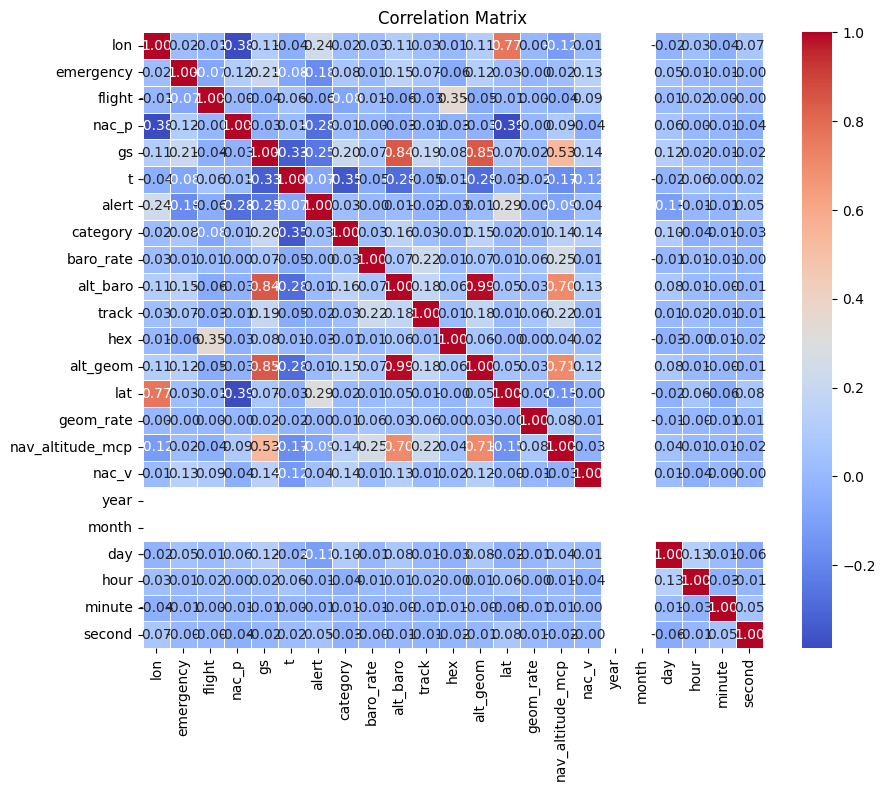

In [513]:
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [514]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming your dataframe is named 'df'

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr()

# Step 2: Create a Plotly heatmap for better interactivity
fig = px.imshow(corr_matrix,
                text_auto=True,  # Display the correlation values on the heatmap
                aspect="auto",  # Automatically adjust aspect ratio
                color_continuous_scale='RdBu_r',  # Color scale (reversed Red-Blue)
                zmin=-1, zmax=1)  # Set limits for correlation values (-1 to 1)

# Step 3: Add titles and display the heatmap
fig.update_layout(
    title="Correlation Matrix (Interactive)",
    xaxis_nticks=len(corr_matrix.columns),  # Make sure every column label is shown
    yaxis_nticks=len(corr_matrix.columns),  # Make sure every row label is shown
    autosize=True
)

# Display the figure
fig.show()


C:\Users\Domenick Dobbs\AppData\Local\Temp\ipykernel_205968\2640460913.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



alt_baro - 

In [491]:
combined_df.category.unique()

array([ 3,  2,  1,  7,  5,  0,  4,  6, 10,  8, 11,  9])

In [476]:
combined_df.emergency.unique()

array([2, 1, 3, 0])

In [477]:
combined_df.dtypes

lon                             float64
emergency                         int32
flight                            int32
seen                             object
nac_p                           float64
gs                              float64
t                                 int32
timestamp           datetime64[ns, UTC]
alert                             int32
nav_heading                      object
category                          int32
baro_rate                       float64
alt_baro                        float64
track                           float64
hex                               int32
alt_geom                        float64
lat                             float64
geom_rate                       float64
nav_altitude_mcp                float64
nac_v                           float64
year                              int64
month                             int64
day                               int64
hour                              int64
minute                            int64


In [478]:
# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Drop irrelevant columns like 'timestamp' for now
drop_cols = ['year', 'month', 'day', 'hour', 'minute', 'second', 'nav_heading', 'seen']
df = df.drop(columns=drop_cols)

# Step 2: One-Hot Encode the 'category' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_encoded = encoder.fit_transform(df[['category']].fillna('A0'))

# Get the category names
category_labels = encoder.categories_[0]

# Step 3: Split the data into features (X) and target (y)
X = df.drop(columns=['category'])  # Features
y = category_encoded  # One-Hot Encoded target (category)


# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [479]:
# # One-Hot Encode the 'category' column and create a new DataFrame for it
# category_encoded_df = pd.DataFrame(encoder.fit_transform(df[['category']].fillna('A0')), columns=encoder.categories_[0])

# # Concatenate X and the encoded category DataFrame
# full_df = pd.concat([X, category_encoded_df], axis=1)

# # Save the preprocessed data to a CSV file
# full_df.to_csv('preprocessed_ads_b_data.csv', index=False) 

In [480]:
# Output for verification
print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)
print("First few rows of features:")
X_train.head()

Training data shape:  (27832, 16)
Test data shape:  (6958, 16)
First few rows of features:


,lon,emergency,flight,nac_p,gs,t,alert,baro_rate,alt_baro,track,hex,alt_geom,lat,geom_rate,nav_altitude_mcp,nac_v
25696,-82.084245,2,3032,9.0,90.7,90,3,256.000000,3550.000000,34.220000,2524,3775.000000,28.284943,-128.000000,14137.141991,1.0
22278,-82.269375,2,2487,10.0,362.4,224,3,47.531835,19000.000000,323.410000,1195,19725.000000,28.348389,-64.000000,19008.000000,1.0
22177,-82.548100,2,969,10.0,0.0,195,108,47.531835,9653.945477,0.000000,441,10229.752267,27.393851,-11.597031,14137.141991,1.0
17411,-81.881843,2,836,10.0,456.8,48,3,768.000000,32925.000000,328.150000,4377,35025.000000,27.758727,-11.597031,34016.000000,2.0
16670,-82.692498,2,1433,10.0,0.0,124,108,47.531835,9653.945477,192.134633,3592,10229.752267,27.918148,-11.597031,14137.141991,1.0


In [481]:
# Check the data types of X_train
print(X_train.dtypes)

# Check for any non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

lon                 float64
emergency             int32
flight                int32
nac_p               float64
gs                  float64
t                     int32
alert                 int32
baro_rate           float64
alt_baro            float64
track               float64
hex                   int32
alt_geom            float64
lat                 float64
geom_rate           float64
nav_altitude_mcp    float64
nac_v               float64
dtype: object
Non-numeric columns: Index([], dtype='object')


In [541]:
X_train.head()
# X_train.columns

,lon,emergency,flight,nac_p,gs,t,alert,baro_rate,alt_baro,track,hex,alt_geom,lat,geom_rate,nav_altitude_mcp,nac_v
25696,-82.084245,2,3032,9.0,90.7,90,3,256.000000,3550.000000,34.220000,2524,3775.000000,28.284943,-128.000000,14137.141991,1.0
22278,-82.269375,2,2487,10.0,362.4,224,3,47.531835,19000.000000,323.410000,1195,19725.000000,28.348389,-64.000000,19008.000000,1.0
22177,-82.548100,2,969,10.0,0.0,195,108,47.531835,9653.945477,0.000000,441,10229.752267,27.393851,-11.597031,14137.141991,1.0
17411,-81.881843,2,836,10.0,456.8,48,3,768.000000,32925.000000,328.150000,4377,35025.000000,27.758727,-11.597031,34016.000000,2.0
16670,-82.692498,2,1433,10.0,0.0,124,108,47.531835,9653.945477,192.134633,3592,10229.752267,27.918148,-11.597031,14137.141991,1.0


In [482]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Build a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.argmax(axis=1))  # y_train needs to be converted from one-hot to label form

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test.argmax(axis=1), y_pred_rf)
print("Random Forest Test Accuracy: ", accuracy_rf)


Random Forest Test Accuracy:  0.9668008048289738


In [483]:
y_train.shape

(27832, 12)

Epoch 1/50


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.4843 - loss: 432.0954 - val_accuracy: 0.6204 - val_loss: 31.6238
Epoch 2/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6288 - loss: 24.9069 - val_accuracy: 0.7063 - val_loss: 16.8721
Epoch 3/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6677 - loss: 16.5621 - val_accuracy: 0.6892 - val_loss: 13.8937
Epoch 4/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6871 - loss: 12.9914 - val_accuracy: 0.7284 - val_loss: 8.8507
Epoch 5/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6765 - loss: 12.6347 - val_accuracy: 0.5639 - val_loss: 17.6256
Epoch 6/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6743 - loss: 11.2067 - val_accuracy: 0.7192 - val_loss: 8.7346
Epoch 7/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6854 - loss: 9.5535 - val_accuracy: 0.6233 - val_loss: 10.2370
Epoch 8/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6888 - loss: 8.5110 -

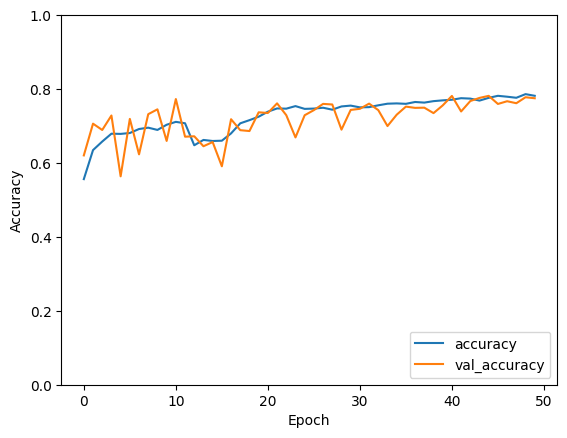

In [484]:
import tensorflow as tf

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Optionally, plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [485]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [486]:
from sklearn.svm import SVC

# Train the SVC model
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train.argmax(axis=1))

# Predict and evaluate
y_pred_svc = svc.predict(X_test_scaled)

In [487]:
from sklearn.linear_model import Perceptron

# Train the Perceptron model
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train.argmax(axis=1))

# Predict and evaluate
y_pred_perceptron = perceptron.predict(X_test_scaled)


In [488]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train.argmax(axis=1))

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [489]:
import xgboost as xgb

# Train the XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgboost_model.fit(X_train_scaled, y_train.argmax(axis=1))

# Predict and evaluate
y_pred_xgb = xgboost_model.predict(X_test_scaled)


### Start evaluation

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test.argmax(axis=1), y_pred_rf)

Perceptron Performance:
Accuracy: 0.7107
Precision: 0.6828
Recall: 0.7107
F1-Score: 0.6849


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



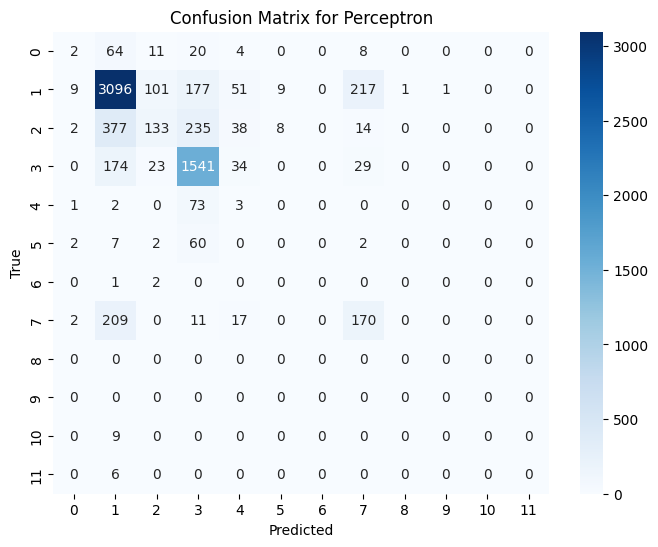

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Logistic Regression Performance:
Accuracy: 0.7982
Precision: 0.7648
Recall: 0.7982
F1-Score: 0.7734


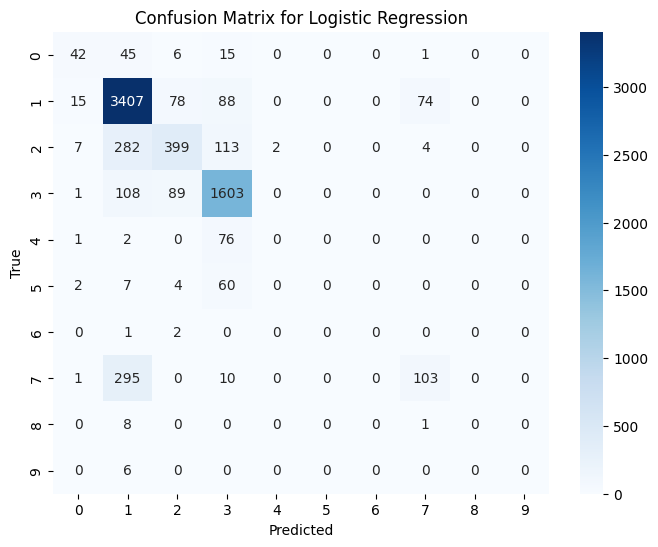

SVC Performance:
Accuracy: 0.8711
Precision: 0.8492
Recall: 0.8711
F1-Score: 0.8548


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



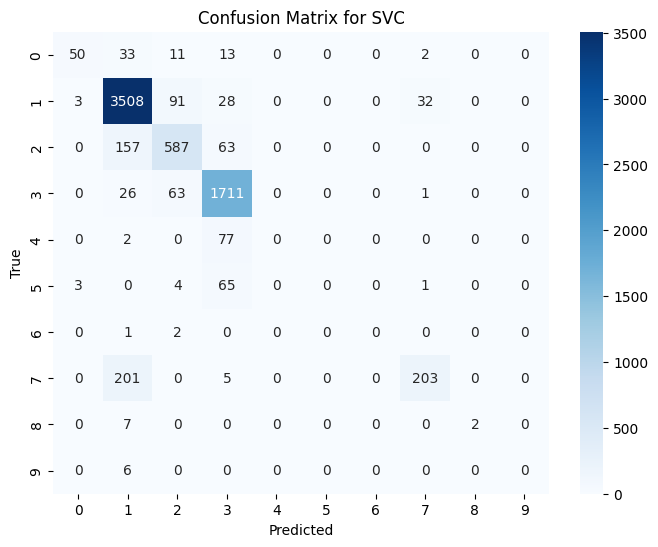

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBoost Performance:
Accuracy: 0.9823
Precision: 0.9814
Recall: 0.9823
F1-Score: 0.9816


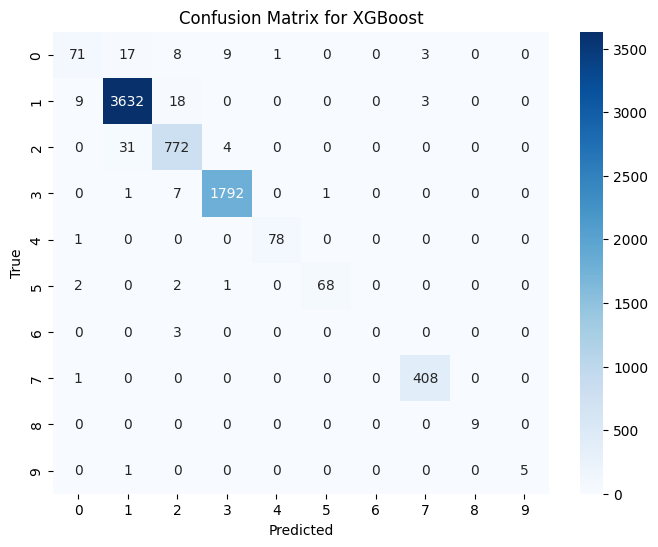

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest Performance:
Accuracy: 0.9668
Precision: 0.9661
Recall: 0.9668
F1-Score: 0.9660


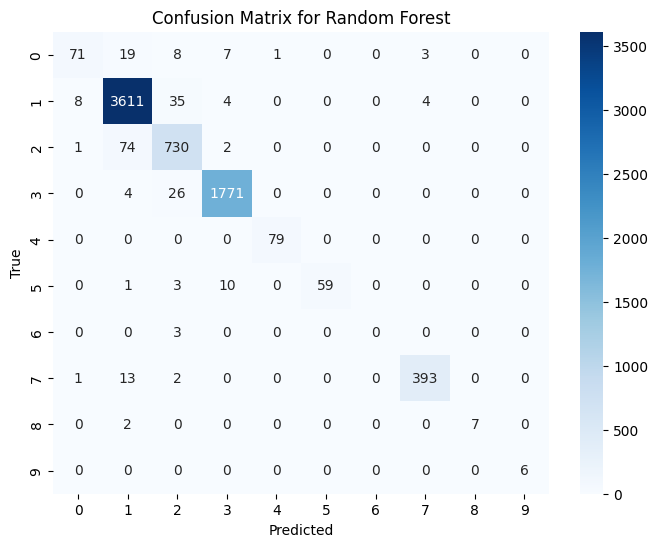

In [534]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call the function for each model
evaluate_model(y_test.argmax(axis=1), y_pred_perceptron, "Perceptron")
evaluate_model(y_test.argmax(axis=1), y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test.argmax(axis=1), y_pred_svc, "SVC")
evaluate_model(y_test.argmax(axis=1), y_pred_xgb, "XGBoost")
evaluate_model(y_test.argmax(axis=1), y_pred_rf, "Random Forest")


In [535]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],              # Number of trees
    'max_depth': [10, 20, 30, 40, None],                     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                               # Whether bootstrap samples are used when building trees
}

# Set up the RandomizedSearchCV with cross-validation
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random iterations to perform
    cv=3,  # 3-fold cross-validation
    verbose=2,  # For detailed output
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring=make_scorer(accuracy_score)
)

# Fit the randomized search model
rf_random.fit(X_train, y_train.argmax(axis=1))

# Get the best parameters and best estimator
print("Best Hyperparameters:", rf_random.best_params_)
best_rf_model = rf_random.best_estimator_

# Make predictions with the best model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_rf_tuned = accuracy_score(y_test.argmax(axis=1), y_pred_rf_tuned)
print("Tuned Random Forest Test Accuracy: ", accuracy_rf_tuned)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Tuned Random Forest Test Accuracy:  0.9711123886174188


In [537]:
# Rebuild the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    bootstrap=False,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train.argmax(axis=1))

# Make predictions on the test data
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_rf_tuned = accuracy_score(y_test.argmax(axis=1), y_pred_rf_tuned)
print("Tuned Random Forest Test Accuracy: ", accuracy_rf_tuned)


Tuned Random Forest Test Accuracy:  0.9711123886174188


In [563]:
import pickle

# Save the model to a pickle file
filename = 'adsb_scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = 'adsb_rf_model.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

filename = 'adsb_le.pkl'
pickle.dump(cat_le, open(filename, 'wb'))

In [543]:
X_train.columns

Index(['lon', 'emergency', 'flight', 'nac_p', 'gs', 't', 'alert', 'baro_rate',
       'alt_baro', 'track', 'hex', 'alt_geom', 'lat', 'geom_rate',
       'nav_altitude_mcp', 'nac_v'],
      dtype='object')